In [2]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('../../')
from astroLuSt.datascience import dtw as aldadtw




plt.style.use('astroLuSt.styles.LuSt_style')
plt.rcParams['figure.autolayout'] = False


# Dynamic Time Warping (DTW)

I define the overall correlation per sample $x$ and unique class $c_u$ as follows:

\begin{align}
    r_{sum}
        = \sum_{i} |r_P(c_{u,i})| - th,
\end{align}

where the threshold for the correlation is given by $th$ and the pearson correlation coeficient of the $i$-th sample that is part of the unique class $c_u$ is denoted by $r_P(x_{u,i})$.

First we generate some dummy dataset

In [3]:

#independent variabel (different lengths!)
x1 = np.linspace(0,3*2*np.pi, 30)
x2 = np.linspace(0,3*2*np.pi, 20)
x3 = np.linspace(0,3*2*np.pi, 35)


#template dataset
X_template = [
    x2,
    np.sin(x1-1),
    3*x1,
    np.tanh(x1),
]
y_template = [2,0,2,1]  #dummy template labels

#training set
X = [
    np.sin(x1)+np.random.normal(size=x1.shape)*0.2,
    np.cos(x2)+np.random.normal(size=x2.shape)*0.2,
    np.sin(x3)+np.random.normal(size=x3.shape)*0.2,
    np.random.randn(100),
    np.tanh(x1),
    -x2+np.random.randn(x2.shape[0])*6,
]


## Fit and predict with classifier

If no template labels are passed, the classifier will consider each curve in `X_template` its own class.
Since `threshold=None` will simply return the overall correlation for each sample and class.
I.e. will ignore the `multi_hot_encoded` parameter.

In [4]:
importlib.reload(aldadtw)

dtw = aldadtw.DTW(
    X_template=X_template,
    threshold=None,
    window=None,
)

dtw.fit(X)
y_pred = dtw.predict(X=None, y=None, multi_hot_encoded=True)
print(y_pred)


[[0.8485281374238574 0.9966276658864225 0.7229440390678191
  0.774294269593323]
 [0.5118745001228026 0.9902103423019967 0.3162277660168379
  0.6911089486812976]
 [0.9046363218749423 0.9981871081813445 0.7814232798295111
  0.8113784821731511]
 [0.9814464356974785 0.9383086843046637 0.9820556067413388
  0.9884464056352076]
 [0.9455630748167482 0.6911089486812982 0.9999999999999998
  0.9999999999999998]
 [1.0 0.9486542508507744 0.9382160753247617 0.9405789408224171]]


If we set `threshold=0.8`, and `multi_hot_encoded=True`, the classifier will return 0, it the overall correlation tends to be not present, and 1 if there is an overall correlation.

In [5]:
importlib.reload(aldadtw)

dtw = aldadtw.DTW(
    X_template=X_template,
    # y_template=y_template,
    threshold=0.8,
    # threshold=None,
    window=None,
)

dtw.fit(X, y=None)
y_pred = dtw.predict(X=None, y=None, multi_hot_encoded=True)
print(y_pred)


[[1 1 0 0]
 [0 1 0 0]
 [1 1 0 1]
 [1 1 1 1]
 [1 0 1 1]
 [1 1 1 1]]


If we pass some template labels, those will be considered in the calculation of the overall correlation and thus also multi-hot-encoding.
I.e. since there are three unique classes in `y_template`, the output `y_pred` will have three elements in the first axis.
Note that the first axis is sorted in ascending order by the unique classes.

In [6]:
importlib.reload(aldadtw)

dtw = aldadtw.DTW(
    X_template=X_template,
    y_template=y_template,
    threshold=0.8,
    window=None,
)

dtw.fit(X, y=None)
y_pred = dtw.predict(X=None, y=None, multi_hot_encoded=0.8)
print(y_pred)


[[1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [0 1 1]
 [1 1 1]]


If you want to see what the classifier sees, simply call `.plot_result` with the approproate arguments.

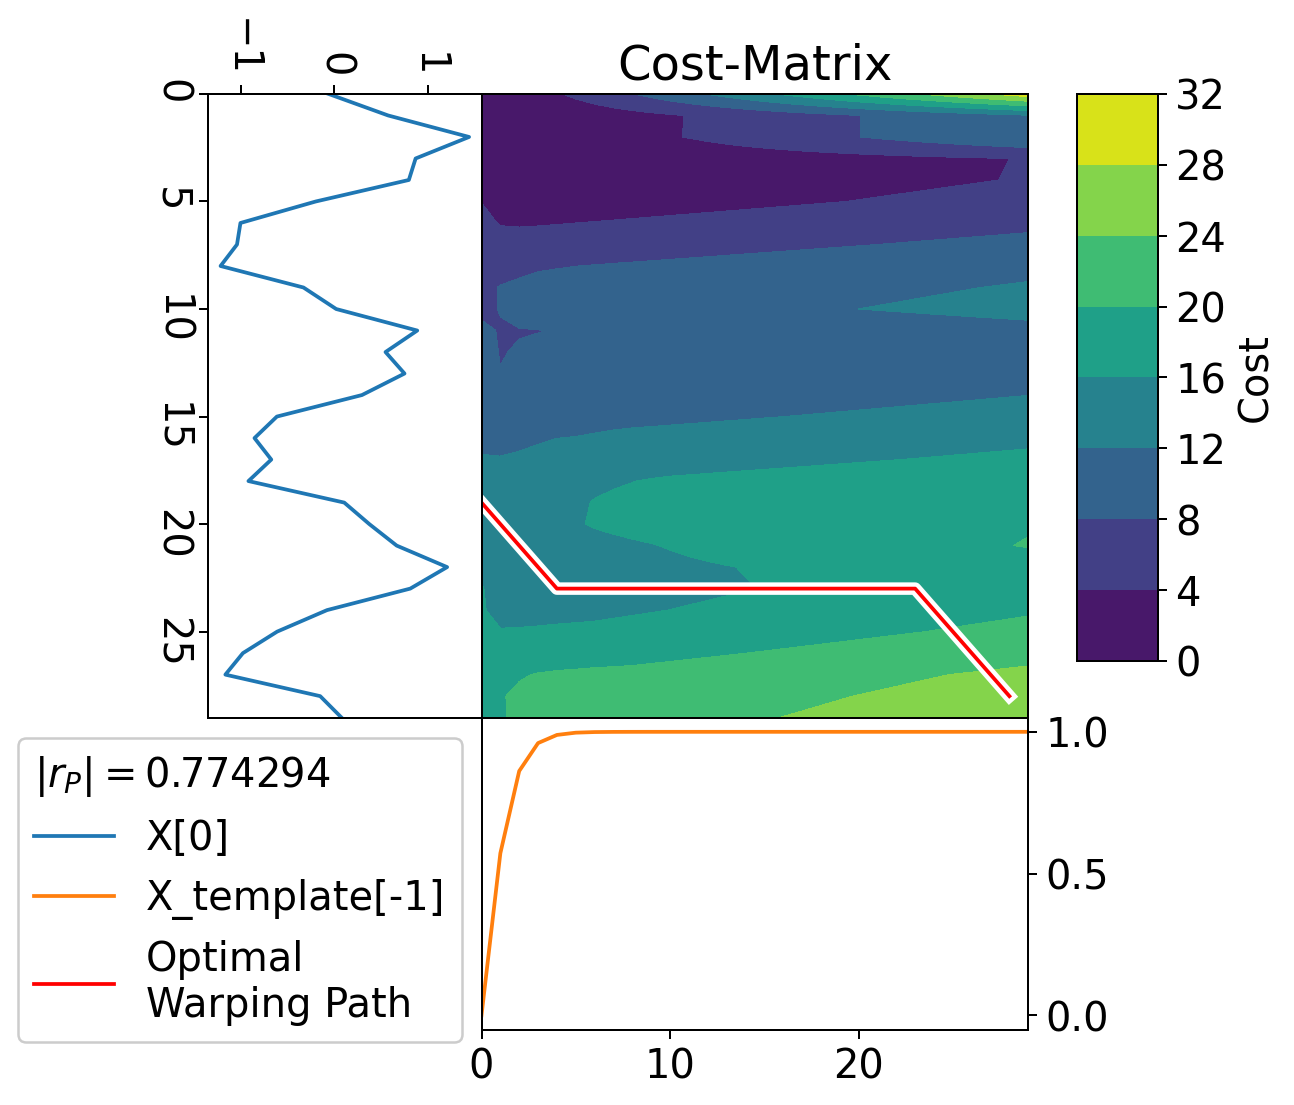

In [7]:

fig, axs = dtw.plot_result(
    X, X_idx=0, Xtemp_idx=-1,
)

plt.show()